In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
#read csv data
filename = "features_30_sec.csv"
df = pd.read_csv(filename)
df = df.drop(labels="filename",axis=1)   #drop the filename which is the first column 
label = df.iloc[:,-1]  #The last column in csv file is the label 
encoder = LabelEncoder()  #label music class
y=encoder.fit_transform(label)


In [3]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
x = fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2)  #split our csv data: 80% for training, and 20% for testing 

In [5]:
#print(x_train)

In [6]:
#print(y_train)

In [7]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [8]:
# we use rmse to determine the optimal K value in range[1,sqrt(N)]
rmse = []
N = len(y_train)

for i in range(1,int(np.sqrt(N))):    #(k range = sqrt(N))
    
    neighs = KNeighborsClassifier(n_neighbors=i,weights='distance')
    neighs.fit(x_train,y_train)
    y_predictions = neighs.predict(x_test)
    diff = np.subtract(y_predictions, y_test)
    sq_diff = np.square(diff)
    rmse_value = np.sqrt(np.mean(sq_diff))
    rmse.append(rmse_value)
    
print (rmse)



[2.1621748310439655, 2.1621748310439655, 2.222611077089287, 2.3205602771744585, 2.283637449333847, 2.369599122214557, 2.1931712199461306, 2.1118712081942874, 2.038381711063951, 2.115419580130618, 2.233830790368868, 2.29237867726953, 2.35902522241709, 2.329162939770423, 2.434132288927617, 2.4072806234421447, 2.449489742783178, 2.450510150968569, 2.414539293529927, 2.471841418861655, 2.445403852127497, 2.463736998950984, 2.360084744241189, 2.378024390118823, 2.355843797877949, 2.3173260452512934, 2.32163735324878]


Text(0, 0.5, 'RMSE')

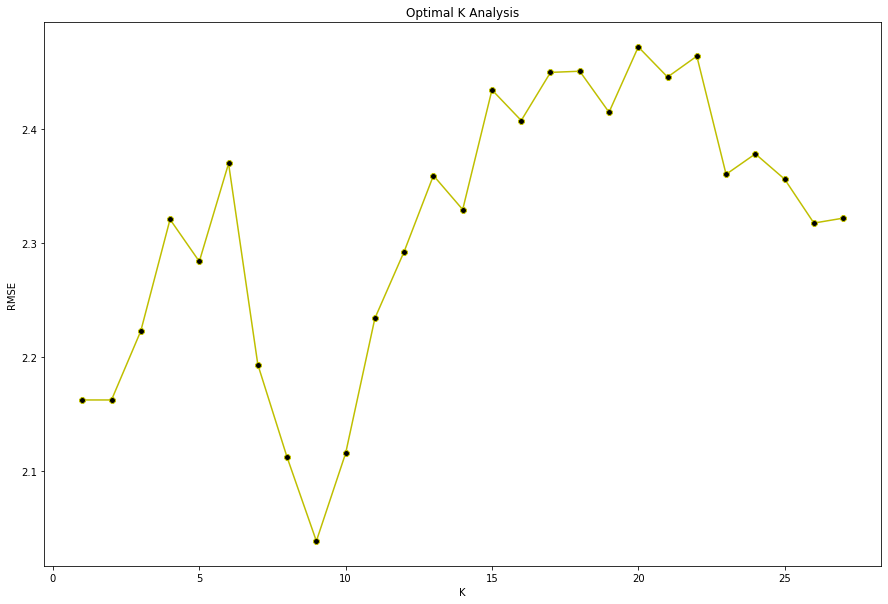

In [9]:
# visual of RMSE with different K value
plt.figure(figsize=(15,10))

plt.plot(range(1, int(np.sqrt(N))), rmse, color='y', linestyle='-', marker='8', markerfacecolor='k')

plt.title('Optimal K Analysis')
plt.xlabel('K')
plt.ylabel('RMSE')

In [10]:
optimalK = (rmse.index(min(rmse))) + 1
neigh = KNeighborsClassifier(n_neighbors = optimalK, weights='distance') 
print("optimal K value is :", optimalK )
neigh.fit(x_train,y_train)
y_prediction = neigh.predict(x_test)
print (y_prediction)
print (y_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediction))

optimal K value is : 9
[9 3 7 8 6 6 1 1 3 2 2 4 1 9 0 7 3 8 5 9 3 3 3 1 7 3 0 7 3 9 3 6 4 8 6 8 4
 8 2 4 6 3 9 2 8 0 0 8 8 2 8 9 2 9 0 3 7 7 7 1 1 7 1 1 1 5 7 3 0 3 2 6 2 2
 2 8 0 5 4 2 9 4 1 0 0 2 6 6 5 0 1 6 7 3 6 9 1 6 8 9 2 9 9 3 2 2 1 0 1 3 7
 3 2 9 3 0 5 4 1 7 9 3 2 9 2 3 8 0 6 7 0 1 7 6 7 7 1 8 6 9 2 4 1 6 5 9 6 3
 7 8 4 2 4 5 4 2 3 1 1 7 3 6 9 1 6 6 0 7 8 2 5 9 3 4 5 3 0 2 9 8 6 6 3 5 7
 0 5 3 7 1 7 7 7 8 3 9 0 2 6 7]
[8 0 7 9 6 4 1 1 2 2 0 4 1 9 0 7 6 8 5 9 3 3 3 1 7 3 0 7 3 6 8 6 3 8 3 4 4
 4 6 3 6 7 9 2 0 0 0 2 4 8 8 9 2 9 0 3 5 4 4 1 1 2 1 1 5 5 7 3 0 9 3 6 9 2
 2 8 0 5 4 0 9 4 5 0 0 0 6 6 5 0 5 6 5 3 6 9 1 6 8 9 0 9 9 3 2 2 1 0 1 3 7
 3 2 3 6 0 5 4 1 7 9 3 2 9 2 9 8 0 6 7 0 1 7 4 7 7 1 8 6 4 2 4 1 6 5 3 6 1
 7 7 4 5 4 5 4 2 3 7 1 7 9 6 9 1 6 6 0 8 9 2 5 9 3 4 5 9 0 2 5 8 6 8 3 7 7
 0 5 9 7 1 4 7 7 8 2 9 0 0 6 7]
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        25
           1       0.82      0.95      0.88        19


In [11]:
#FNN
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam,SGD


model = tf.keras.Sequential()

# create our mlp model with 6 layers (including input layer, normalization layer and output layer)

model.add(Dense(512, activation='relu',input_dim=x_test.shape[1]))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Train our model 
history = model.fit(x_train, to_categorical(y_train),validation_data=(x_test, to_categorical(y_test)),
                    epochs=20, batch_size=64)

# Analysis
loss, accuracy = model.evaluate(x_test, to_categorical(y_test))
print('\n\n Loss:', loss, 'Accuracy:', accuracy)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               30208     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 205,386
Trainable params: 204,362
Non-trainable params: 1,024
______________________________________________

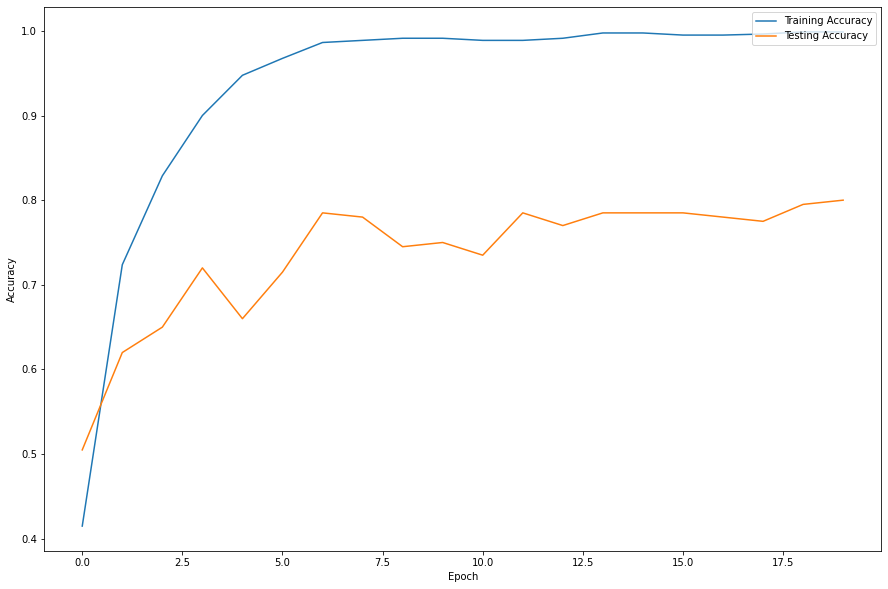

In [12]:
plt.figure(figsize=(15, 10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper right')
plt.show()


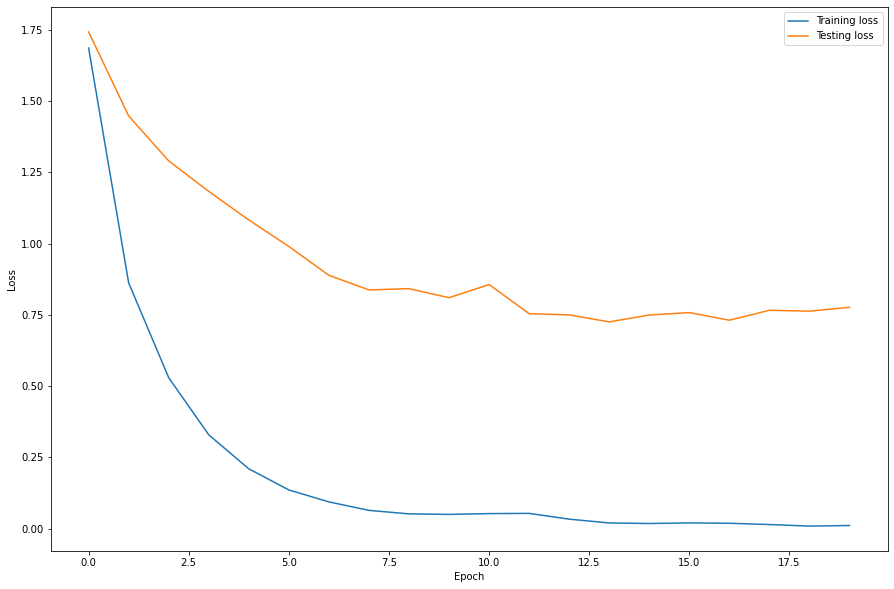

In [13]:
plt.figure(figsize=(15, 10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Testing loss'], loc='upper right')
plt.show()